In [130]:
# グラフをインライン表示に
%matplotlib inline

# 描画ライブラリ
import matplotlib
import matplotlib.pyplot as plt

# 数値計算ライブラリ
import numpy as np

# データ解析支援ライブラリ
import pandas as pd

# 日付ライブラリ
import datetime as dt

# CSVファイルを読み込み
df = pd.read_csv("2532854.csv",
                 header=0,
                 parse_dates=True,
                 index_col='date', # indexとするカラム名
                )

# DataFrameを表示
df

,sales
date,
2014-01-01,0
2014-01-02,0
2014-01-03,1
2014-01-04,1
2014-01-05,3
2014-01-06,0
2014-01-07,2
2014-01-08,1
2014-01-09,0


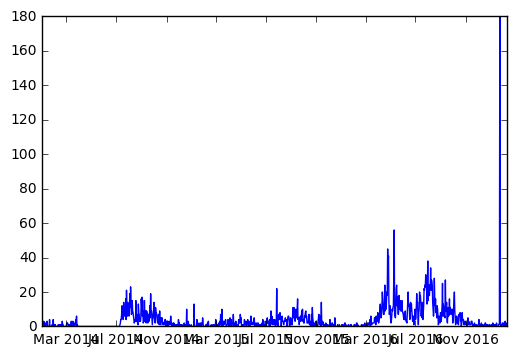

In [131]:
# 2017-01-23が、180個売れている!!

# グラフ表示
plt.plot(df)

In [132]:
# 平均値
ave = np.average(df)

# 標準偏差 (平均値からの距離の平均)
total = 0
for i in range(len(df)):
    total += (df.sales[i] - ave)**2
sd = np.sqrt(total/len(df))

# 中央値
median = np.median(df)

# 最大値
max = np.max(df.sales)

# 最小値
min = np.min(df.sales)


# 表示
print('平均値: {}'.format(ave))
print('標準偏差: {}'.format(sd))
print('中央値: {}'.format(median))
print('最大値: {}'.format(max))
print('最小値: {}'.format(min))

# 要約統計量を表示
df.describe()

平均値: 3.926121372031662
標準偏差: 7.860245553043119
中央値: 1.0
最大値: 180
最小値: 0


,sales
count,1137.000000
mean,3.926121
std,7.863704
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,180.000000


閾値: 82.52857690246285
[検知した外れ値] index:2017-01-23 00:00:00, sales:180
[修正した後の値] index:2017-01-23 00:00:00, sales:11


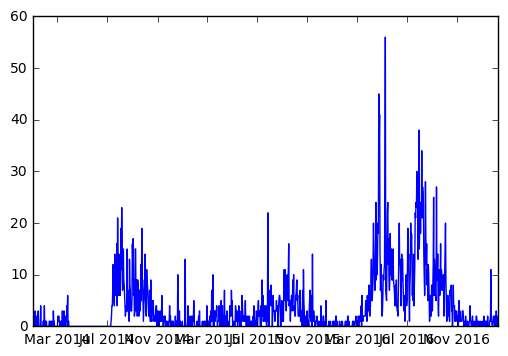

In [133]:
# 「平均値 + (10 x 標準偏差)」より大きい値は、外れ値とする
out = ave + (10 * sd)
print('閾値: {}'.format(out))

# 外れ値は、(平均値 + 標準偏差) に置き換え
for index, line in df.iterrows():
    if line['sales'] > out:
        print('[検知した外れ値] index:{}, sales:{}'.format(index, line['sales']))
        # 値を置換 (int型にキャスト)
        df.loc[index, 'sales'] = int(ave + sd)
        # 置換後の値
        print('[修正した後の値] index:{}, sales:{}'.format(index, df.loc[index, 'sales']))

# 値を修正後のグラフを表示
plt.plot(df)

In [134]:
year = []
month = []
day = []
yyyymm = []

# 各行のindexとその行を表すSeriesオブジェクトを順番に取得
for index, line in df.iterrows():
    # indexに格納している日付を文字列型で取得
    ymd = str(index)
    # 日付のパーツを抜き出し
    year.append(ymd[0:4])
    month.append(ymd[5:7])
    day.append(ymd[5:7])
    yyyymm.append(ymd[:7])

# DataFrameに列を追加    
df['year'] = year
df['month'] = month
df['day'] = day
df['yyyymm'] = yyyymm

# yyyymm列の値ごとに、sales列の値を合計する (Seriesオブジェクト)
monthly_sales = df.groupby('yyyymm')['sales'].sum()

# SeriesオブジェクトからDataFrameを作成
summary = pd.DataFrame({'monthly_sales':monthly_sales})

# 集計結果を表示
summary

,monthly_sales
yyyymm,
2014-01,26
2014-02,11
2014-03,35
2014-04,0
2014-05,0
2014-06,0
2014-07,183
2014-08,244
2014-09,224


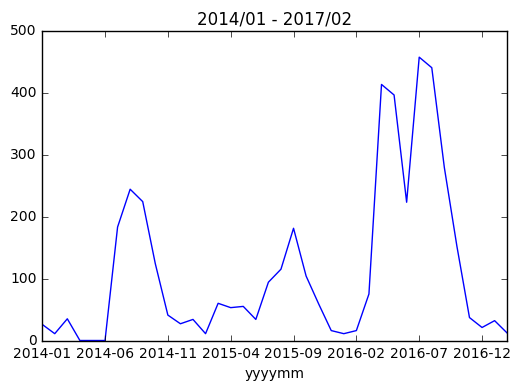

In [135]:
# 月別の販売個数グラフを描画
summary['monthly_sales'].plot(title="2014/01 - 2017/02")

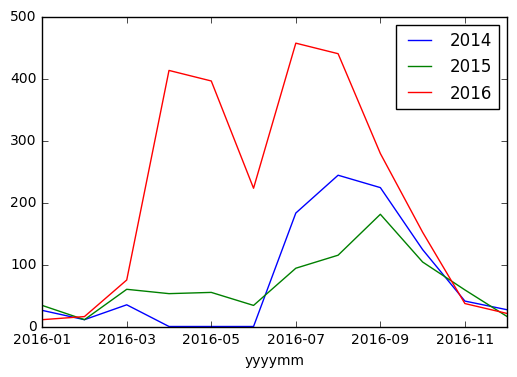

In [136]:
# 年別にデータを分割
summary_2014 = summary['2014-01':'2014-12']
summary_2015 = summary['2015-01':'2015-12']
summary_2016 = summary['2016-01':'2016-12']


# 年別グラフを描画
summary_2014['monthly_sales'].plot(label="2014")
summary_2015['monthly_sales'].plot(label="2015")
summary_2016['monthly_sales'].plot(label="2016")

# 判例を描画
plt.legend()

In [137]:
# 0だとエラーになるので、販売個数を +100
summary_2014['monthly_sales+100'] = summary_2014.loc[:, "monthly_sales"] + 100

# log(対数)値の計算結果を列に追加
summary_2014.loc[:, "log"] = np.log(summary_2014.loc[:, "monthly_sales+100"])

# DataFrameを表示
summary_2014

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,monthly_sales,monthly_sales+100,log
yyyymm,,,
2014-01,26,126,4.836282
2014-02,11,111,4.709530
2014-03,35,135,4.905275
2014-04,0,100,4.605170
2014-05,0,100,4.605170
2014-06,0,100,4.605170
2014-07,183,283,5.645447
2014-08,244,344,5.840642
2014-09,224,324,5.780744


In [138]:
# indexの型を Timestampに
summary_2014.index = pd.to_datetime(summary_2014.index)

# データ型の確認
type(summary_2014.index[10])

pandas.tslib.Timestamp

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


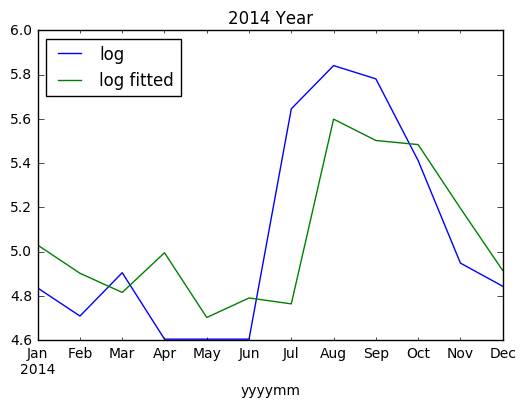

In [139]:
# ARMAモデル
from statsmodels.tsa import arima_model

# モデル作成
model = arima_model.ARMA(summary_2014["log"], order=(1,1))
results = model.fit()

# モデルの適用結果を列に追加
summary_2014.loc[:,"log fitted"] = None
summary_2014.loc[:,"log fitted"] = results.fittedvalues

# グラフ描画（どれぐらい合っているか）
summary_2014.loc[:,["log","log fitted"]].plot(title="2014 Year")

In [140]:
# 今後 12か月の予測値 (monthlyデータなので)
results.forecast(steps = 12)

(array([ 4.91699391,  4.97432553,  5.00257667,  5.01649791,  5.02335783,
         5.02673818,  5.0284039 ,  5.02922471,  5.02962918,  5.02982849,
         5.02992671,  5.0299751 ]),
 array([ 0.3219684 ,  0.41117114,  0.4300484 ,  0.43450844,  0.43558453,
         0.43584542,  0.43590875,  0.43592413,  0.43592786,  0.43592877,
         0.43592899,  0.43592904]),
 array([[ 4.28594743,  5.54804038],
        [ 4.1684449 ,  5.78020616],
        [ 4.15969729,  5.84545605],
        [ 4.16487702,  5.86811879],
        [ 4.16962784,  5.87708782],
        [ 4.17249684,  5.88097951],
        [ 4.17403845,  5.88276935],
        [ 4.17482913,  5.8836203 ],
        [ 4.17522628,  5.88403209],
        [ 4.17542381,  5.88423318],
        [ 4.17552159,  5.88433182],
        [ 4.17556988,  5.88438032]]))

In [141]:
# 予測値(log値)を元の数字に戻す
log_pred,_,_ = results.forecast(steps = 12)
pred = np.exp(log_pred)

# Numpy Arrayを表示
pred

array([ 136.59138883,  144.65122962,  148.79606428,  150.8819745 ,
        151.92057195,  152.43498499,  152.6891111 ,  152.81449186,
        152.87631324,  152.90678598,  152.92180417,  152.92920519])

In [142]:
# 販売個数+100 しているので、元の値に戻す
sales = np.array([])
for item in pred:
    sales = np.append(sales, item - 100)

# Numpy Arrayを表示
sales

array([ 36.59138883,  44.65122962,  48.79606428,  50.8819745 ,
        51.92057195,  52.43498499,  52.6891111 ,  52.81449186,
        52.87631324,  52.90678598,  52.92180417,  52.92920519])

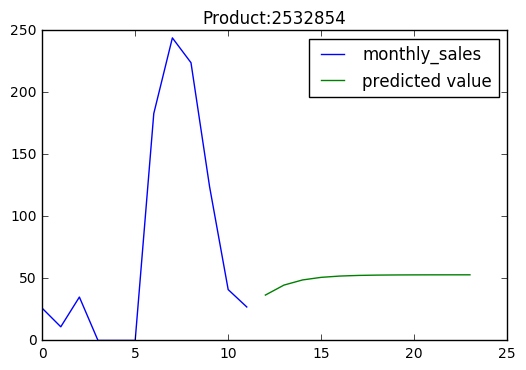

In [143]:
# DataFrameの数
n = len(summary_2014)

# グラフのタイトル
plt.title('Product:2532854')

# 販売個数を描画
plt.plot(range(n), summary_2014["monthly_sales"].values, label="monthly_sales")

# 12か月後までの今後の予測値を描画
plt.plot(range(n, n + 12), sales, label="predicted value")

# 判例を描画
plt.legend()